In [1]:
library(tidyverse)

options("scipen"=999)
options(stringsAsFactors = FALSE)
source("/usr/share/pluto/config.R")
source("/usr/share/pluto/goofy/plot.common.R")
source("/usr/share/pluto/goofy/misc.common.R")

library(pracma)
library(ggthemes)
library(reshape2)
library(quantmod)
library(lubridate)
library(ggrepel)
library(PerformanceAnalytics)
library(ggpubr)

options(repr.plot.width=16, repr.plot.height=8)
options(tibble.width = Inf)

## Individual Stocks

Assume that these are "low volatility"

In [2]:
vol1 <- 0.25
vol2 <- 0.50
tseq <- seq(by=0.05*pi, length.out=100)

stock1 <- data.frame(X=tseq, Y=sin(tseq)+vol1)
stock2 <- data.frame(X=tseq, Y=sin(tseq)+vol2)

stock12 <- merge(stock1, stock2, by=c('X'))
names(stock12) <- c('X', 'Y1', 'Y2')
stock12$Y2 <- lag(stock12$Y2, 10)

stock12 <- na.omit(stock12)

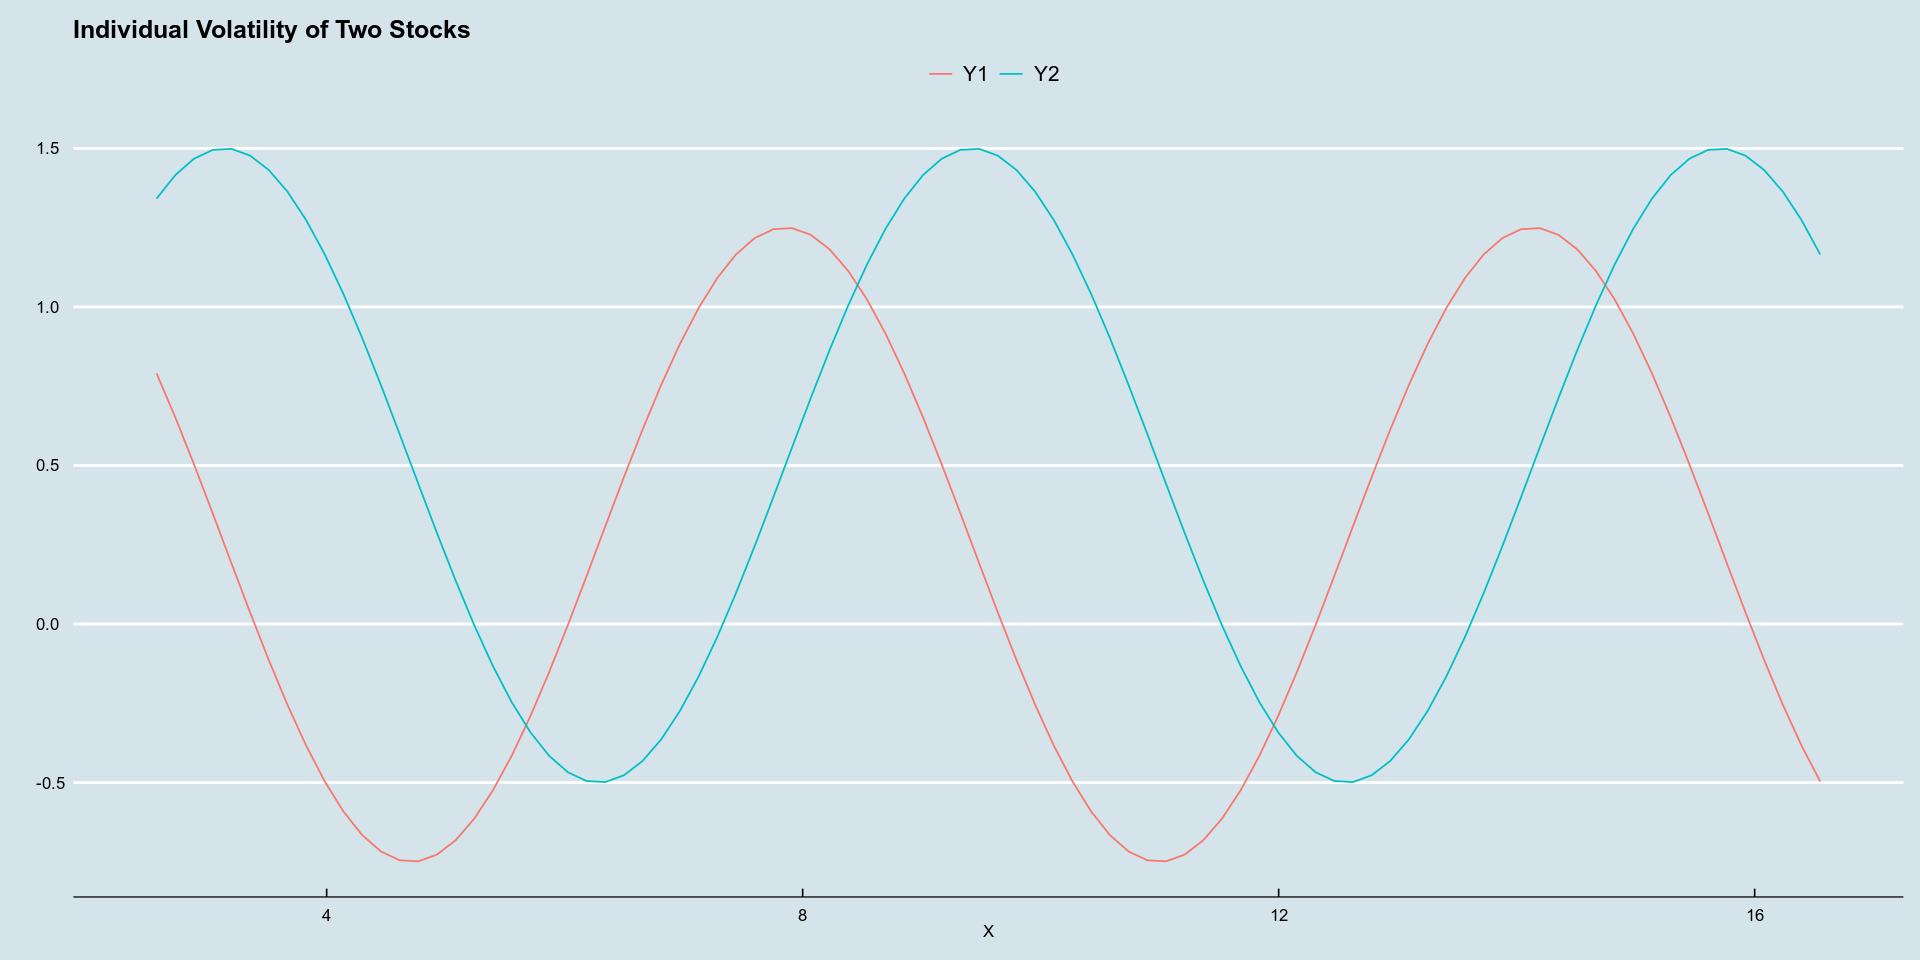

In [3]:
ggplot(melt(stock12, id='X'), aes(x=X, y=value, color=variable)) +
    theme_economist() +
    geom_line() +
    labs(y='', color='', title='Individual Volatility of Two Stocks')    

## Portfolio of Stocks

Put the two stocks above in a portfolio

In [4]:
stock12$PORT <- stock12$Y1 + stock12$Y2

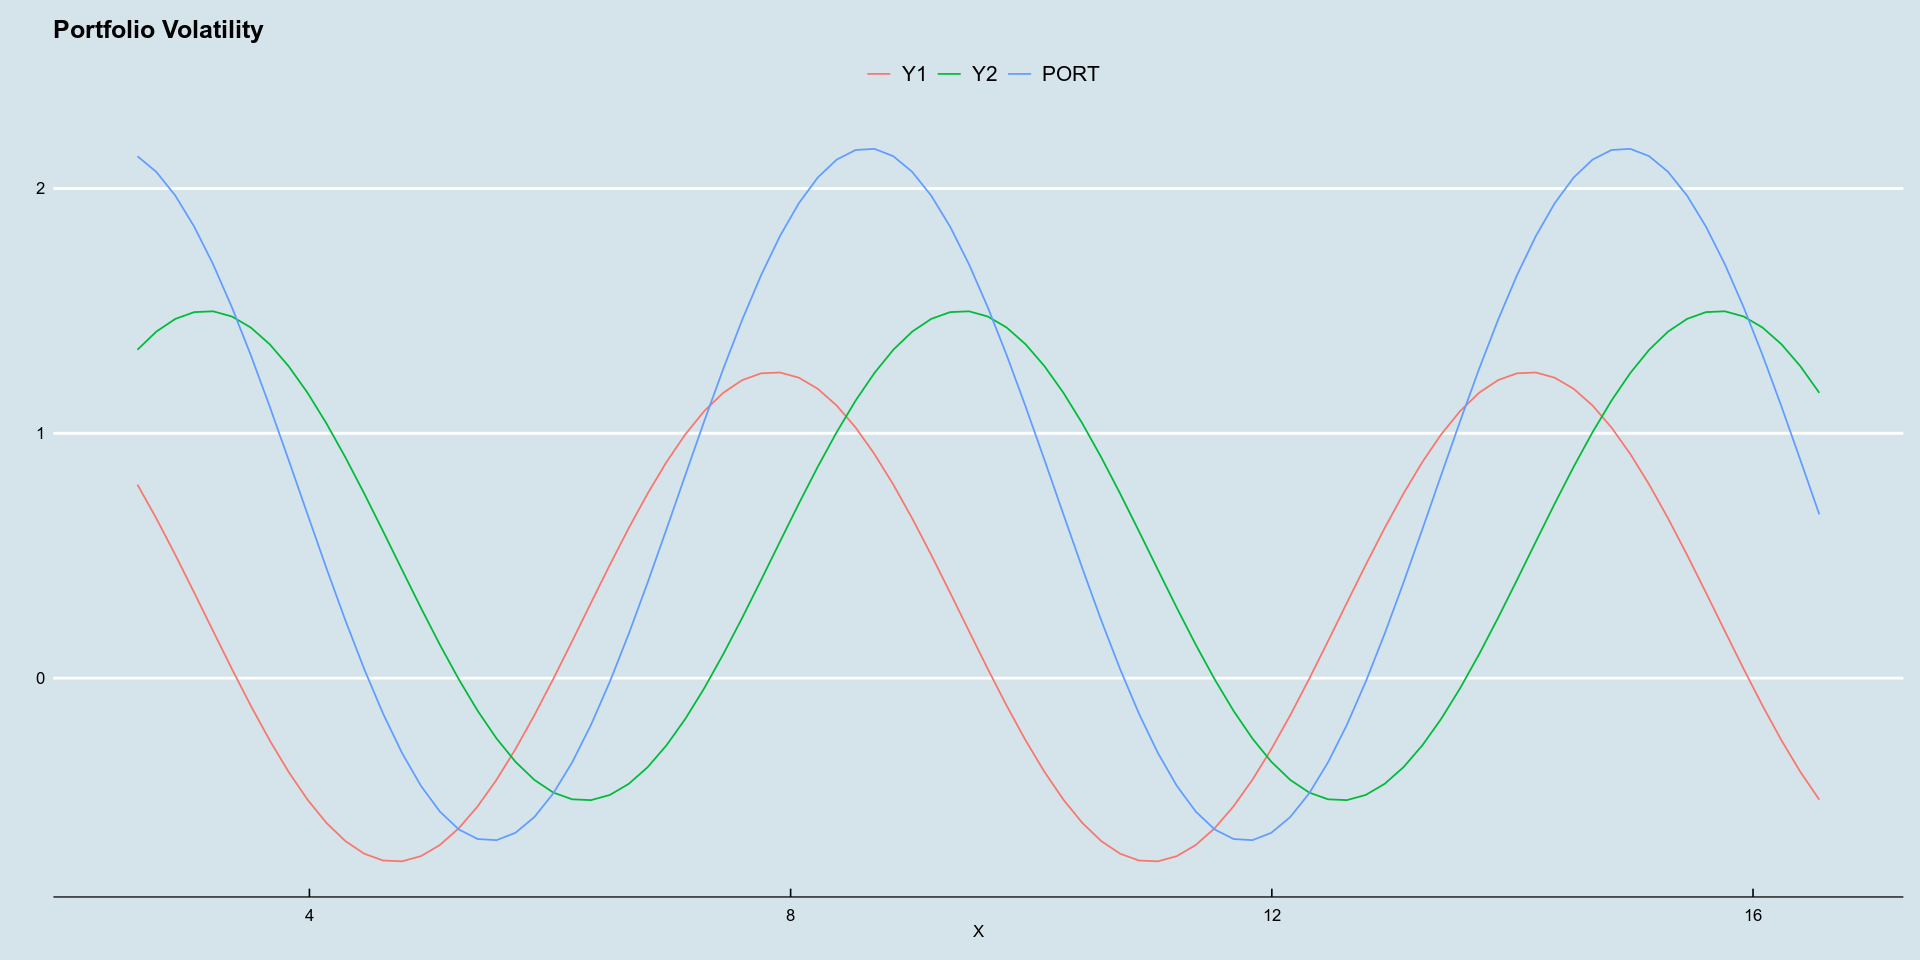

In [5]:
ggplot(melt(stock12, id='X'), aes(x=X, y=value, color=variable)) +
    theme_economist() +
    geom_line() +
    labs(y='', color='', title='Portfolio Volatility')  

Even though the components are *low vol*, their vols add up in a way that portfolio volatility is high. This is because of the correlation between the two. Now, consider two *high vol* stocks that are negatively correlated.

In [6]:
stock1 <- data.frame(X=tseq, Y=sin(tseq)+vol1)
stock2 <- data.frame(X=tseq, Y=sin(tseq)+vol2)

stock12 <- merge(stock1, stock2, by=c('X'))
names(stock12) <- c('X', 'Y1', 'Y2')

stock12$Y2 <- lag(stock12$Y2, 20)
stock12 <- na.omit(stock12)

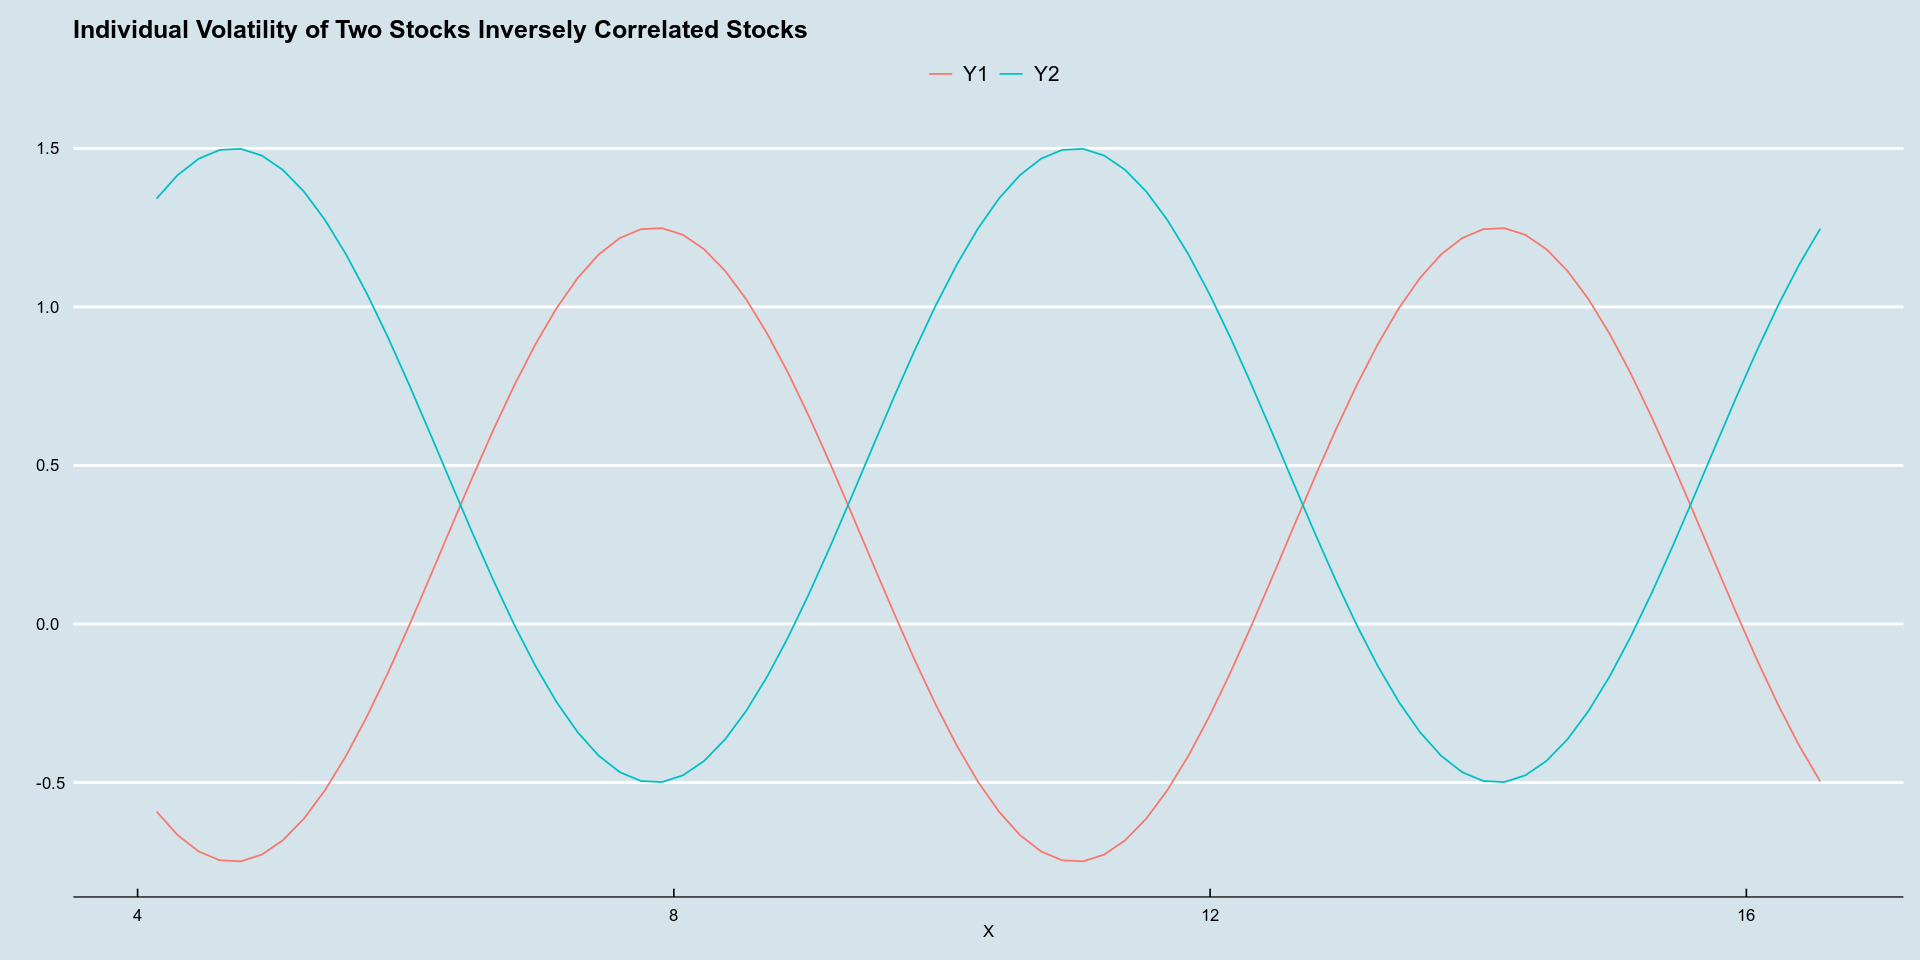

In [7]:
ggplot(melt(stock12, id='X'), aes(x=X, y=value, color=variable)) +
    theme_economist() +
    geom_line() +
    labs(y='', color='', title='Individual Volatility of Two Stocks Inversely Correlated Stocks')    

In [8]:
stock12$PORT <- stock12$Y1 + stock12$Y2

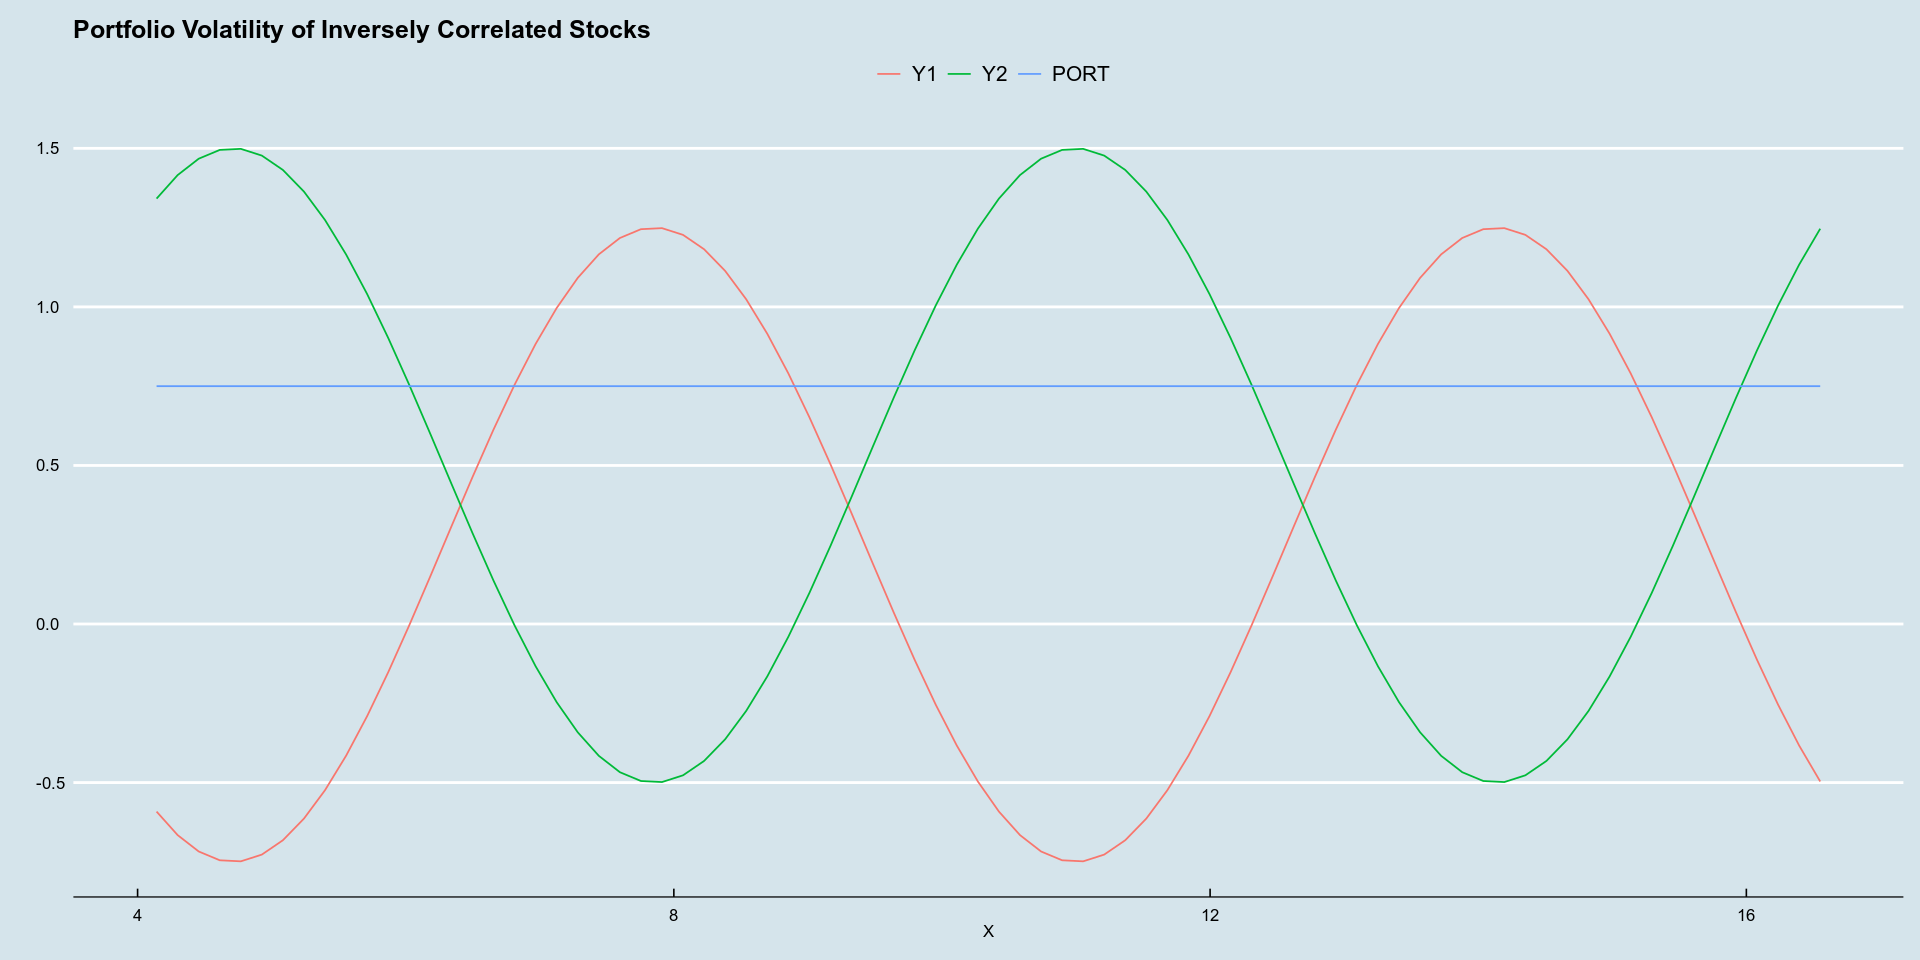

In [9]:
ggplot(melt(stock12, id='X'), aes(x=X, y=value, color=variable)) +
    theme_economist() +
    geom_line() +
    labs(y='', color='', title='Portfolio Volatility of Inversely Correlated Stocks')  

This is the essense of Minimum Volatility Portfolio Optimization

This notebook was created using [pluto](https://pluto.studio). Thank you for playing fair!